Training SimpleRNN model...
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.5812 - loss: 0.6502 - val_accuracy: 0.7500 - val_loss: 0.5121
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.8345 - loss: 0.3847 - val_accuracy: 0.7715 - val_loss: 0.4896
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.8562 - loss: 0.3394 - val_accuracy: 0.7567 - val_loss: 0.5038
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.8249 - loss: 0.3876 - val_accuracy: 0.7141 - val_loss: 0.5708
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.7954 - loss: 0.4403 - val_accuracy: 0.6036 - val_loss: 0.6683
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6023 - loss: 0.6695
Test accuracy: 0.6036400198936462
Training LSTM model...
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 48s 58ms/step - accuracy: 0.7450 - loss: 0.5077 - val_accuracy: 0.8376 - val_loss: 0.3859
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 44s 56ms/step - accuracy: 0

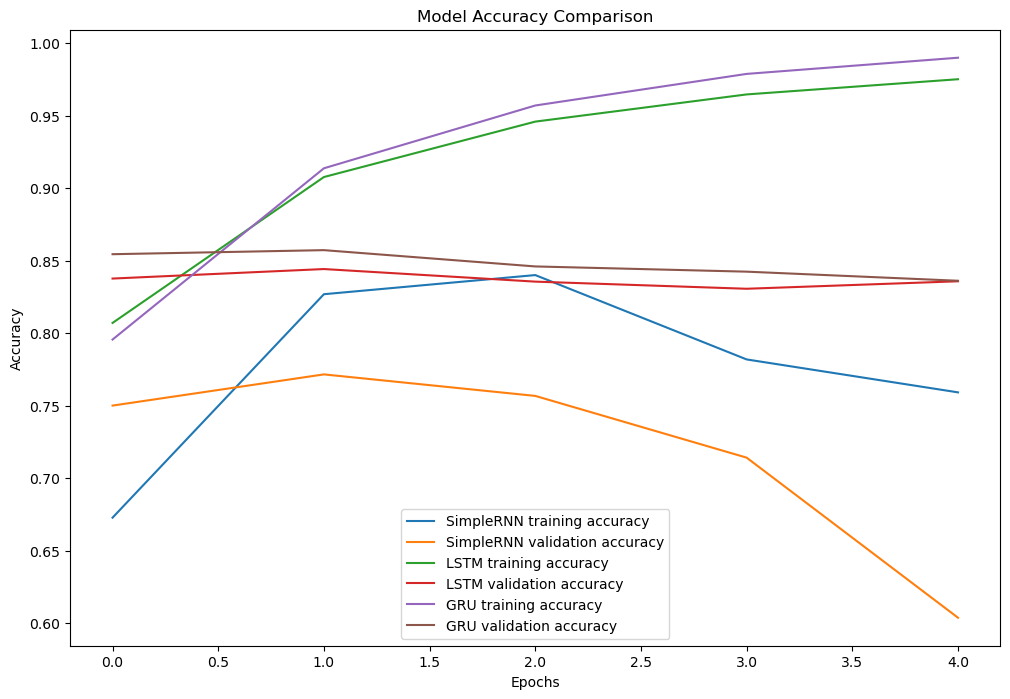

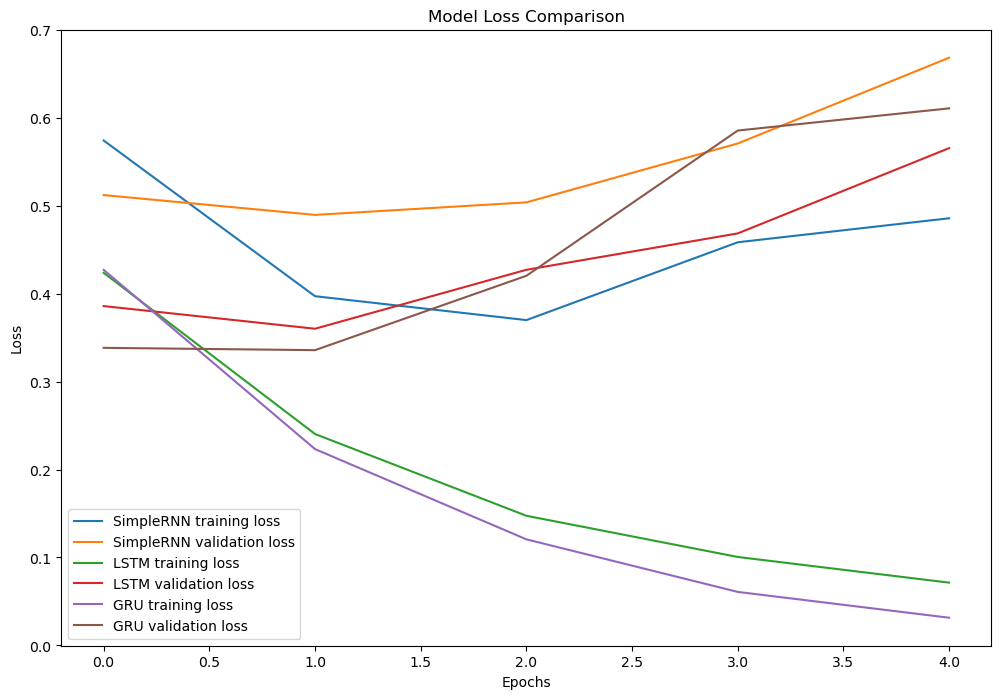

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow.keras.datasets import imdb 
from tensorflow.keras.preprocessing import sequence 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN, LSTM, GRU 
max_features = 20000 
maxlen = 100 
batch_size = 32 

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features) 
x_train = sequence.pad_sequences(x_train, maxlen=maxlen) 
x_test = sequence.pad_sequences(x_test, maxlen=maxlen) 
def create_model(rnn_type, units=128): 
    model = Sequential() 
    model.add(Embedding(max_features, 128)) 
    if rnn_type == 'SimpleRNN': 
        model.add(SimpleRNN(units)) 
    elif rnn_type == 'LSTM': 
        model.add(LSTM(units)) 
    elif rnn_type == 'GRU': 
        model.add(GRU(units)) 
    model.add(Dense(1, activation='sigmoid')) 
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
    return model 
    
rnn_types = ['SimpleRNN', 'LSTM', 'GRU'] 
histories = {} 
for rnn_type in rnn_types: 
    print(f"Training {rnn_type} model...") 
    model = create_model(rnn_type) 
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=5, validation_data=(x_test, 
y_test)) 
    histories[rnn_type] = history 
    test_loss, test_acc = model.evaluate(x_test, y_test) 
    print(f"Test accuracy: {test_acc}") 

def plot_history(histories, metric='accuracy'): 
    plt.figure(figsize=(12, 8)) 
    for rnn_type in histories: 
        plt.plot(histories[rnn_type].history[metric], label=f'{rnn_type} training {metric}') 
        plt.plot(histories[rnn_type].history[f'val_{metric}'], label=f'{rnn_type} validation {metric}') 
    plt.title(f'Model {metric.capitalize()} Comparison') 
    plt.ylabel(metric.capitalize()) 
    plt.xlabel('Epochs') 
    plt.legend(loc='best') 
    plt.show() 
 
plot_history(histories, 'accuracy') 
plot_history(histories, 'loss')